# Conservation of Biodiversity in National Parks

### Introduction

Questions that we want to answer:

- What's the distribution of conservation status for protected and unprotected species?
- How many different species are listed?
- Which category it's the most protected and which is the least protected?
- What's the conservation status for the most protected category?
- How many times the most protected category was spotted at a park?

### Importing necessary libraries and files:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

### Observing the structure of the datasets:

#### "species_info" dataset:

Looking at the rows:

In [3]:
species_info.sample(n=5)

,category,scientific_name,common_names,conservation_status
886,Vascular Plant,Packera obovata,Roundleaf Ragwort,NaN
788,Vascular Plant,Doellingeria infirma,Cornel-Leaf Whitetop,NaN
4173,Vascular Plant,Achnatherum richardsonii,"Richardson Needlegrass, Richardson's Needlegrass",NaN
1421,Vascular Plant,Betula lenta,"Black Or Sweet Birch, Sweet Birch",NaN
4380,Vascular Plant,Potentilla hippiana var. hippiana,Woolly Cinquefoil,NaN


Structure of the dataset:

In [4]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


#### "observations" dataset:

Looking at the rows:

In [5]:
observations.sample(n=5)

,scientific_name,park_name,observations
10483,Lilium lancifolium,Yellowstone National Park,261
4920,Impatiens pallida,Yosemite National Park,130
14158,Carex debilis var. debilis,Great Smoky Mountains National Park,90
14590,Corallorrhiza odontorhiza,Yosemite National Park,139
14732,Campanula rotundifolia,Yellowstone National Park,270


Structure of the dataset:

In [6]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


### Exploring the data in the datasets:

#### "species_info" dataset:

Number of different species:

In [7]:
species_info.scientific_name.nunique()

5541

Which and how many categories there are:

In [8]:
species_info_categories = species_info.groupby('category').scientific_name.nunique()\
    .reset_index()\
    .sort_values(by='scientific_name', ascending=False)

species_info_categories.columns = ['category', 'different_species']
species_info_categories['percentage'] = species_info_categories.different_species / (species_info_categories.different_species.sum()) * 100

species_info_categories

,category,different_species,percentage
6,Vascular Plant,4262,76.917524
1,Bird,488,8.807075
4,Nonvascular Plant,333,6.009746
3,Mammal,176,3.176322
2,Fish,125,2.255910
0,Amphibian,79,1.425735
5,Reptile,78,1.407688


The Plants, Vascular and no Vascular, are the categories that appears the most, with them beeing the whole majority of the different species.

Which and how many conservation statuses there are:

In [9]:
species_info_conservation = species_info.conservation_status.value_counts(dropna=False)\
                                                            .reset_index()\
                                                            .rename(columns={'index': 'conservation_status', 'conservation_status': 'count'})
species_info_conservation['percentage'] = species_info_conservation['count'] / species_info_conservation['count'].sum() * 100
species_info_conservation.at[0, 'conservation_status'] = 'Unprotected'

species_info_conservation

,conservation_status,count,percentage
0,Unprotected,5633,96.720467
1,Species of Concern,161,2.764423
2,Endangered,16,0.274725
3,Threatened,10,0.171703
4,In Recovery,4,0.068681


Most of the species aren't in any kind of danger.

Conservation status for the endangered species:

In [10]:
species_info_conservation = species_info.conservation_status.value_counts()\
                                                            .reset_index()\
                                                            .rename(columns={'index': 'conservation_status', 'conservation_status': 'count'})
species_info_conservation['percentage'] = species_info_conservation['count'] / species_info_conservation['count'].sum() * 100

species_info_conservation

,conservation_status,count,percentage
0,Species of Concern,161,84.293194
1,Endangered,16,8.376963
2,Threatened,10,5.235602
3,In Recovery,4,2.094241


Most of the species that are in any kind of danger, are in the least concern level of endangerment.

#### "observations" dataset:

Listed National Parks and their number of observations:

In [11]:
observations_total = observations.groupby('park_name').observations.sum().reset_index()
observations_total['percentage'] = observations_total.observations / observations_total.observations.sum() * 100

observations_total

,park_name,observations,percentage
0,Bryce National Park,576025,17.377688
1,Great Smoky Mountains National Park,431820,13.027270
2,Yellowstone National Park,1443562,43.549794
3,Yosemite National Park,863332,26.045248


There are 4 parks listed, the one with the most observations it's the Yellowstone.

### Tidying the dataset:

Filling the NaN values at the "conservation_status" column:

In [12]:
species_info.conservation_status.fillna('Not Protected', inplace=True)
species_info.sample(n=5)

,category,scientific_name,common_names,conservation_status
5186,Vascular Plant,Trifolium microcephalum,"Littlehead Clover, Smallhead Clover, Small-Hea...",Not Protected
3936,Vascular Plant,Mimulus guttatus,"Common Monkeyflower, Seep Monkeyflower",Not Protected
5481,Vascular Plant,Carex lemmonii,Lemmon's Sedge,Not Protected
2474,Vascular Plant,Aronia melanocarpa,Black Chokeberry,Not Protected
634,Vascular Plant,Zizia trifoliata,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern


### Analyzing the datasets:

Seeing each conservation statuses for each category:

In [13]:
conservation_category = species_info[species_info.conservation_status != 'Not Protected']\
    .groupby(['conservation_status', 'category'])['common_names']\
    .count()\
    .unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Some things we can take from this table:

- The most endangered category it's the Mammals;
- The Birds are the category that is recovering the most.

How many species in each category are and aren't protected:

In [14]:
species_info['is_protected'] = species_info.conservation_status != 'Not Protected'

In [15]:
category_number_protected = species_info.groupby(['category', 'is_protected'])\
    .scientific_name.nunique()\
    .unstack()\
    .reset_index()

category_number_protected.columns = ['category', 'not_protected', 'protected']
category_number_protected['percentage_protected'] = category_number_protected.protected / (category_number_protected.protected + category_number_protected.not_protected) * 100

category_number_protected

,category,not_protected,protected,percentage_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Even though the absolute number of the protected Birds and Vascular Plants are higher, the correct number to be considered it's the percentage, because what we want to know it's how much of the total it's protected. So, the right order is: The Mammals, with 17%, followed by the Birds, with 15%.

Conservation status for the Mammals:

In [24]:
conservation_mammals = species_info[species_info.category == 'Mammal'].conservation_status.value_counts()
conservation_mammals_df = conservation_mammals.reset_index().rename(columns={'index': 'conservation_status', 'conservation_status': 'count'})
conservation_mammals_df['percentage'] = conservation_mammals_df['count'] / conservation_mammals_df['count'].sum() * 100

conservation_mammals_df

,conservation_status,count,percentage
0,Not Protected,176,82.242991
1,Species of Concern,28,13.084112
2,Endangered,7,3.271028
3,Threatened,2,0.934579
4,In Recovery,1,0.467290


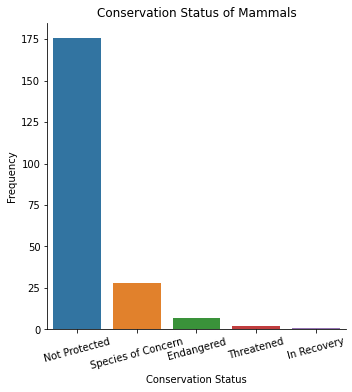

<Figure size 432x288 with 0 Axes>

In [26]:
sns.catplot(data=conservation_mammals_df, x='conservation_status', y='count', kind='bar')

plt.title("Conservation Status of Mammals")
plt.ylabel("Frequency")
plt.xlabel("Conservation Status")
plt.xticks(rotation=15)

plt.show()
plt.clf()

How many times the Mammals were spotted at each park

In [31]:
observations_mammals = observations.merge(species_info[species_info.category == 'Mammal'])\
    .groupby('park_name').observations.sum()

observations_mammals

park_name
Bryce National Park                    28830
Great Smoky Mountains National Park    21056
Yellowstone National Park              70701
Yosemite National Park                 42533
Name: observations, dtype: int64

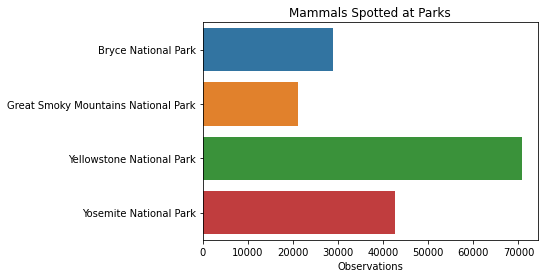

<Figure size 432x288 with 0 Axes>

In [38]:
sns.barplot(x=observations_mammals, y=observations_mammals.index)

plt.title("Mammals Spotted at Parks")
plt.ylabel('')
plt.xlabel("Observations")

plt.show()
plt.clf()

### Conclusion

Answering the questions asked at the beginning:

- What's the distribution of conservation status for protected and unprotected species?
    - The vast majority of the species aren't protected (96.7%). The species that are in any kind of danger, are in the first level of concern (84% of the protected species).


- How many different categories are listed and what can you tell about it's insights?
    - There are 7 different categories: Plants (Vascular and Nonvascular), Birds, Mammals, Fishes, Amphibians and Reptiles;
    - The predominant category it's the Plants, with them beeing 82.9% of the different species;
    - The least predominant it's the Reptiles, with 1.40%.


- Which category it's the most protected and which is the least protected?
    - The Mammals it's the category most protected, 17% of the Mammals are beeing protected;
    - The least protected category it's the Plants, 1% for the Vascular and 1.5% for Nonvascular.
    

- What's the conservation status for the most protected category?
    - As said before, the Mammals are the most protected species.
    - From least to most risk:
        - Even though the Mammals it's the most protected category, 82.1% of the species isn't protected;
        - "Recovery": 1 (0.4%)
        - "Concern": 28 (13%);
        - "Threatened": 2 (0.9%);
        - "Endangered": 7 (3.2%)
 

- How many times the most protected category was spotted at a park?
    - The Mammals were spotted at all parks, with the most observations beeing in the Yellowstone.